# NPCI MLOps Playground Challenge - 4

(Solution)

## Problem Statement

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Loading the data

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

### EDA
Explore the data, understand the features and handle the missing values.

In [3]:
# Gget the shape of the dataframe
df.shape

(32581, 12)

In [5]:
# Display few samples of the dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# Generate descriptive statistics for the DataFrame.To get summary statistics for numerical columns.
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Generate information about the DataFrame,including index details, column data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### DATA Preprocessing

#### Handling Missing values

In [8]:
# Display the total number of null values of each column
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [9]:
# Handle missing values - replace the missing values with the mean
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())

#### Handling categorical columns

In [10]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [11]:
#Get the distinct categories present in each categorical column
for col in categorical_cols:
    print(f"{col} ---> {df[col].unique()}")

person_home_ownership ---> ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ---> ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ---> ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file ---> ['Y' 'N']


In [12]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
home_ownership_mapping = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
loan_grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
default_on_file_mapping = {'N': 0, 'Y': 1}

In [13]:
# Map categorical values to numbers using respective dictionaries
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['loan_grade'] = df['loan_grade'].map(loan_grade_mapping)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(default_on_file_mapping)

In [14]:
# Display the data to observe the changes
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,0,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,2,2,5500,12.87,1,0.57,0,3
3,23,65500,1,4.0,2,2,35000,15.23,1,0.53,0,2
4,24,54400,1,8.0,2,2,35000,14.27,1,0.55,1,4


#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution

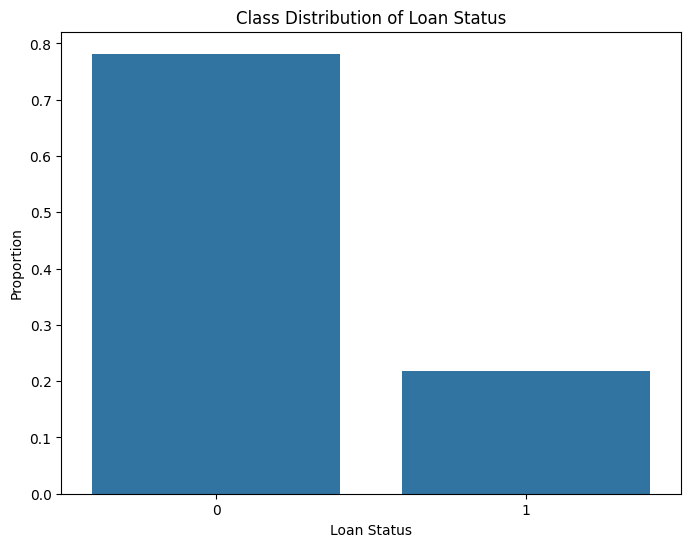

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the class distribution
class_distribution = df['loan_status'].value_counts() / len(df)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.title('Class Distribution of Loan Status')
plt.show()


### Define target variable and features

In [16]:
# define asign features(x) and target variable(y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

### Train-Test split

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26064, 11), (6517, 11), (26064,), (6517,))

### Check the class distribution in the training and test sets

Ensure that both sets have same target class distribution as of the original dataset

In [18]:
# Calculate the class distribution in the training set
y_train.value_counts() / len(y_train)

,count
loan_status,
0,0.781845
1,0.218155


In [19]:
# Calculate the class distribution in the testing set
y_test.value_counts() / len(y_test)

,count
loan_status,
0,0.781801
1,0.218199


### Feature Scaling

In [20]:
# Initialize StandardScaler and transform the training and testing features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training


In [37]:
# Initialize the LogisticRegression model

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Fit the model with the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
# Initialize the DecisionTreeClassifier model

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# Fit the model with the training data
dt_model.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

In [43]:
# Initialize the RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Fit the model with the training data
rf_model.fit(X_train.values, y_train.values)

RandomForestClassifier()

### Model Evaluation


In [46]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test.values)
y_pred_rf = rf_model.predict(X_test.values)

In [47]:
# Evaluate the model performance
# Get accuracy, f1 score, precision, recall of trained model

def evaluate_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Accuracy: {round(acc, 3)}")
    print(f"F1 Score: {round(f1, 3)}")
    print(f"Precision: {round(precision, 3)}")
    print(f"Recall: {round(recall, 3)}")

In [48]:
# Check performance for LogisticRegression model
evaluate_model(y_test, y_pred_lr)

Accuracy: 0.838
F1 Score: 0.546
Precision: 0.702
Recall: 0.447


In [49]:
# Check performance for DecisionTree model
evaluate_model(y_test, y_pred_dt)

Accuracy: 0.888
F1 Score: 0.747
Precision: 0.735
Recall: 0.76


In [50]:
# Check performance for RandomForest model
evaluate_model(y_test, y_pred_rf)

Accuracy: 0.932
F1 Score: 0.821
Precision: 0.961
Recall: 0.717


### Inference

In [51]:
X_test.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6616,22,50000,1,6.0,0,1,6000,11.89,0.12,0,2
21802,32,52000,1,0.0,0,0,7125,7.49,0.14,0,10


In [52]:
# Create a sample input for the model
sample_input = {'person_age': 22,
                'person_income': 50000,
                'person_home_ownership': 1,
                'person_emp_length': 6.0,
                'loan_intent': 0,
                'loan_grade': 1,
                'loan_amnt': 6000,
                'loan_int_rate': 11.89,
                'loan_percent_income': 0.12,
                'cb_person_default_on_file': 0,
                'cb_person_cred_hist_length': 2}

# convert the sample input into a dataframe
sample_input_df = pd.DataFrame(sample_input, index=[0])
sample_input_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,50000,1,6.0,0,1,6000,11.89,0.12,0,2


In [53]:
# Define a simple fuction to predict sample input
def make_prediction(sample_input_df):
    prediction = rf_model.predict(sample_input_df.values)
    label = "Likely to default" if prediction[0] == 1 else "Less likely to default"
    return label


In [54]:
make_prediction(sample_input_df)

'Less likely to default'